# Transaction Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import warnings
warnings.simplefilter(action='ignore')
import datetime

## Gathering File and marge

In [2]:
data_file =  sorted(glob("C:/Users/Yashwant Lohande/Desktop/my own pactice/Transaction Analysis/d2/*.csv"))
data_file

['C:/Users/Yashwant Lohande/Desktop/my own pactice/Transaction Analysis/d2\\21 2.csv',
 'C:/Users/Yashwant Lohande/Desktop/my own pactice/Transaction Analysis/d2\\22 1.csv',
 'C:/Users/Yashwant Lohande/Desktop/my own pactice/Transaction Analysis/d2\\22 2.csv',
 'C:/Users/Yashwant Lohande/Desktop/my own pactice/Transaction Analysis/d2\\23 1.csv',
 'C:/Users/Yashwant Lohande/Desktop/my own pactice/Transaction Analysis/d2\\23 2.csv',
 'C:/Users/Yashwant Lohande/Desktop/my own pactice/Transaction Analysis/d2\\24 1.csv']

In [3]:
df = pd.concat((pd.read_csv(data_file)for data_file in data_file), ignore_index = True)

In [5]:
df = pd.DataFrame(df)

In [6]:
df

,DATE,TRANSACTION PARTICULARS,WITHDRWAL,DEPOSIT,BALANCE,TRAN ID
0,25-10-2021,Initial Cash Deposit,NaN,100.0,100.00,NaN
1,26-10-2021,TRANSFER -FROM 033410154051,NaN,10.0,110.00,NaN
2,26-10-2021,TRANSFER -TO 033410154051,10.0,NaN,100.00,NaN
3,29-10-2021,TRANSFER -FROM 033410113232,NaN,25.0,125.00,NaN
4,30-10-2021,Virtual Debit Card Issuance Fee 30/10/2021,25.0,NaN,100.00,NaN
...,...,...,...,...,...,...
292,21-05-2024,UPI~414206530348~DR~YASHWANT A~IPOS~Gaurav pan...,16.0,NaN,524.53,NaN
293,22-05-2024,UPI~450973141313~DR~YASHWANT A~IPOS~Mrs TARA ...,19.0,NaN,505.53,NaN
294,24-05-2024,UPI~414599574733~DR~YASHWANT A~IPOS~Mr DINESH...,30.0,NaN,475.53,NaN
295,25-05-2024,UPI~414665513545~DR~YASHWANT A~IPOS~Mrs TARA ...,15.0,NaN,460.53,NaN


In [7]:
df.head(11)

,DATE,TRANSACTION PARTICULARS,WITHDRWAL,DEPOSIT,BALANCE,TRAN ID
0,25-10-2021,Initial Cash Deposit,NaN,100.0,100.0,NaN
1,26-10-2021,TRANSFER -FROM 033410154051,NaN,10.0,110.0,NaN
2,26-10-2021,TRANSFER -TO 033410154051,10.0,NaN,100.0,NaN
3,29-10-2021,TRANSFER -FROM 033410113232,NaN,25.0,125.0,NaN
4,30-10-2021,Virtual Debit Card Issuance Fee 30/10/2021,25.0,NaN,100.0,NaN
5,06-11-2021,UPI~131078400740~DR~YASHWANT A~IPOS~8208491270...,1.0,NaN,99.0,NaN
6,06-11-2021,UPI~131067238306~CR~OM SUNIL I~IPOS~8806393517...,NaN,1.0,100.0,NaN
7,06-11-2021,UPI~131047102692~DR~YASHWANT A~IPOS~yashwante1...,1.0,NaN,99.0,NaN
8,06-11-2021,UPI~131073736256~CR~KSHITIJ SU~IPOS~atramkshit...,NaN,2.0,101.0,NaN
9,09-11-2021,APBCR-GEN-Credit Through PFMS-C112108436067,NaN,650.0,751.0,NaN


In [8]:
df.shape

(297, 6)

In [9]:
df.dtypes

DATE                        object
TRANSACTION PARTICULARS     object
WITHDRWAL                  float64
DEPOSIT                    float64
BALANCE                    float64
TRAN ID                     object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATE                     297 non-null    object 
 1   TRANSACTION PARTICULARS  297 non-null    object 
 2   WITHDRWAL                238 non-null    float64
 3   DEPOSIT                  59 non-null     float64
 4   BALANCE                  297 non-null    float64
 5   TRAN ID                  29 non-null     object 
dtypes: float64(3), object(3)
memory usage: 14.0+ KB


In [36]:
df = df.drop(columns=['TRAN ID'])

In [37]:
#correcting dtype of date
df['DATE'] = pd.to_datetime(df['DATE'], format ='%d-%m-%Y')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 296
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DATE                     297 non-null    datetime64[ns]
 1   TRANSACTION PARTICULARS  297 non-null    object        
 2   WITHDRWAL                297 non-null    float64       
 3   DEPOSIT                  297 non-null    float64       
 4   BALANCE                  297 non-null    float64       
 5   YEAR                     297 non-null    int32         
dtypes: datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 15.1+ KB


In [34]:
#extract year form date column for more conveninent
df["YEAR"] = df["DATE"].dt.year
df

,DATE,TRANSACTION PARTICULARS,WITHDRWAL,DEPOSIT,BALANCE,TRAN ID,YEAR
0,2021-10-25,Initial Cash Deposit,0.0,100.0,100.00,NaN,2021
27,2021-12-31,033410154240:Int.Pd:25-10-2021 to 31-12-2021,0.0,3.0,1194.00,NaN,2021
26,2021-12-28,UPI~136211825882~DR~YASHWANT A~IPOS~Jio Mobility~,15.0,0.0,1191.00,NaN,2021
25,2021-12-17,APBCR-GEN-Credit Through PFMS-C122127054928,0.0,650.0,1206.00,NaN,2021
24,2021-12-17,UPI~135140132255~DR~YASHWANT A~IPOS~Jio Mobility~,15.0,0.0,556.00,NaN,2021
...,...,...,...,...,...,...,...
258,2024-02-27,UPI~442487276569~DR~YASHWANT A~IPOS~ANANDGANGA...,15.0,0.0,1283.53,NaN,2024
259,2024-02-27,UPI~442474597690~DR~YASHWANT A~IPOS~Mr YOGESH...,400.0,0.0,883.53,NaN,2024
260,2024-02-27,UPI~405848272378~CR~SURAJ VINO~FDRL~7666954654...,0.0,100.0,983.53,NaN,2024
246,2024-02-05,UPI~403634025978~DR~YASHWANT A~IPOS~Prakash Pu...,390.0,0.0,1556.53,NaN,2024


In [39]:
df.isnull().sum()

DATE                       0
TRANSACTION PARTICULARS    0
WITHDRWAL                  0
DEPOSIT                    0
BALANCE                    0
YEAR                       0
dtype: int64

In [40]:
df.fillna({'WITHDRWAL':00.00, 'DEPOSIT':00.00},inplace=True)

In [41]:
df.head(12)

,DATE,TRANSACTION PARTICULARS,WITHDRWAL,DEPOSIT,BALANCE,YEAR
0,2021-10-25,Initial Cash Deposit,0.0,100.0,100.0,2021
27,2021-12-31,033410154240:Int.Pd:25-10-2021 to 31-12-2021,0.0,3.0,1194.0,2021
26,2021-12-28,UPI~136211825882~DR~YASHWANT A~IPOS~Jio Mobility~,15.0,0.0,1191.0,2021
25,2021-12-17,APBCR-GEN-Credit Through PFMS-C122127054928,0.0,650.0,1206.0,2021
24,2021-12-17,UPI~135140132255~DR~YASHWANT A~IPOS~Jio Mobility~,15.0,0.0,556.0,2021
23,2021-12-16,UPI~135024188218~DR~YASHWANT A~IPOS~Gaurav Gas...,952.0,0.0,571.0,2021
21,2021-12-13,UPI~134786344106~DR~YASHWANT A~IPOS~YUNIS NATT...,40.0,0.0,523.0,2021
20,2021-12-13,UPI~134785439163~DR~YASHWANT A~IPOS~yashwante1...,14.0,0.0,563.0,2021
19,2021-12-13,UPI~134782027282~DR~YASHWANT A~IPOS~HALDIRAM FOOD,26.0,0.0,577.0,2021
18,2021-11-29,UPI~133360935094~DR~YASHWANT A~IPOS~yashwante1...,4999.0,0.0,603.0,2021


In [42]:
df.columns

Index(['DATE', 'TRANSACTION PARTICULARS', 'WITHDRWAL', 'DEPOSIT', 'BALANCE',
       'YEAR'],
      dtype='object')

In [43]:
df.duplicated().sum() 

0

In [44]:
df.describe()

,DATE,WITHDRWAL,DEPOSIT,BALANCE,YEAR
count,297,297.000000,297.000000,297.000000,297.000000
mean,2023-04-23 15:35:45.454545408,90.314714,92.070707,1535.825387,2022.781145
min,2021-10-25 00:00:00,0.000000,0.000000,12.530000,2021.000000
25%,2022-08-29 00:00:00,10.000000,0.000000,475.530000,2022.000000
50%,2023-08-04 00:00:00,15.000000,0.000000,1143.030000,2023.000000
75%,2023-11-13 00:00:00,26.000000,0.000000,2454.530000,2023.000000
max,2024-05-26 00:00:00,7000.000000,7000.000000,8143.030000,2024.000000
std,NaN,516.474469,550.211971,1321.828787,0.898148


In [45]:
df.sort_values(by = ['YEAR'], inplace = True)  # for sort year from start to end

In [46]:
df

,DATE,TRANSACTION PARTICULARS,WITHDRWAL,DEPOSIT,BALANCE,YEAR
0,2021-10-25,Initial Cash Deposit,0.0,100.0,100.00,2021
6,2021-11-06,UPI~131067238306~CR~OM SUNIL I~IPOS~8806393517...,0.0,1.0,100.00,2021
11,2021-11-18,UPI~132221200411~DR~YASHWANT A~IPOS~billdesktez~,599.0,0.0,752.00,2021
10,2021-11-18,UPI~132258795416~CR~ANKUSH PAN~BKID~8805765082...,0.0,600.0,1351.00,2021
9,2021-11-09,APBCR-GEN-Credit Through PFMS-C112108436067,0.0,650.0,751.00,2021
...,...,...,...,...,...,...
292,2024-05-21,UPI~414206530348~DR~YASHWANT A~IPOS~Gaurav pan...,16.0,0.0,524.53,2024
264,2024-02-29,UPI~442673264015~DR~YASHWANT A~IPOS~Anand Auto...,27.0,0.0,771.53,2024
294,2024-05-24,UPI~414599574733~DR~YASHWANT A~IPOS~Mr DINESH...,30.0,0.0,475.53,2024
293,2024-05-22,UPI~450973141313~DR~YASHWANT A~IPOS~Mrs TARA ...,19.0,0.0,505.53,2024


In [47]:
df.to_csv('bank.csv',index = False)  # for downlode our cleaned data its optional.

## Exploratory Data Analysis

In [48]:
df.columns

Index(['DATE', 'TRANSACTION PARTICULARS', 'WITHDRWAL', 'DEPOSIT', 'BALANCE',
       'YEAR'],
      dtype='object')

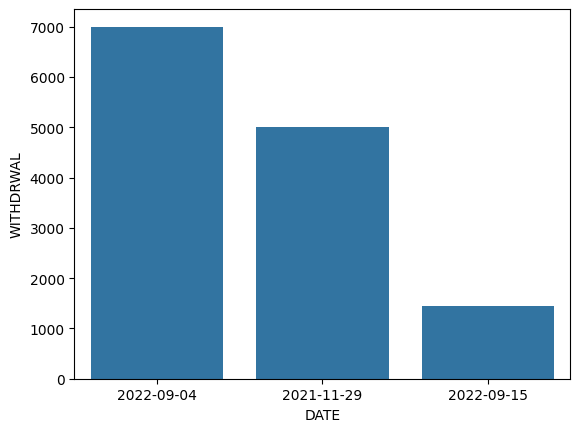

In [49]:
# top 3 highest withdrwal 
s_date = df.groupby(['DATE'], as_index=False)['WITHDRWAL'].sum().sort_values(by='WITHDRWAL', ascending=False).head(3)

sns.barplot(data = s_date, x = 'DATE', y = 'WITHDRWAL')
 
# Show the plot
plt.show()

Between the 25-10-2021 to 25-05-2024 

highest withdrwal is 7000rs on 04-09-2022

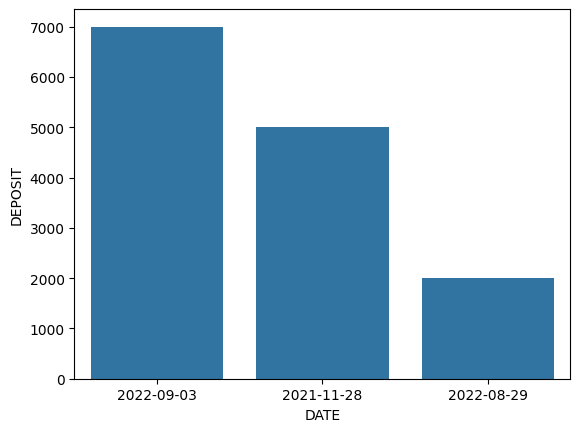

In [50]:
s_date = df.groupby(['DATE'], as_index = False)['DEPOSIT'].sum().sort_values(by='DEPOSIT', ascending=False).head(3) 

sns.barplot(data= s_date, x= 'DATE', y= 'DEPOSIT')

plt.show()

Between the 25-10-2021 to 25-05-2024 highest deposit is 7000rs on 03-09-2022  

and 2nd is 5000rs on 28-11-2021

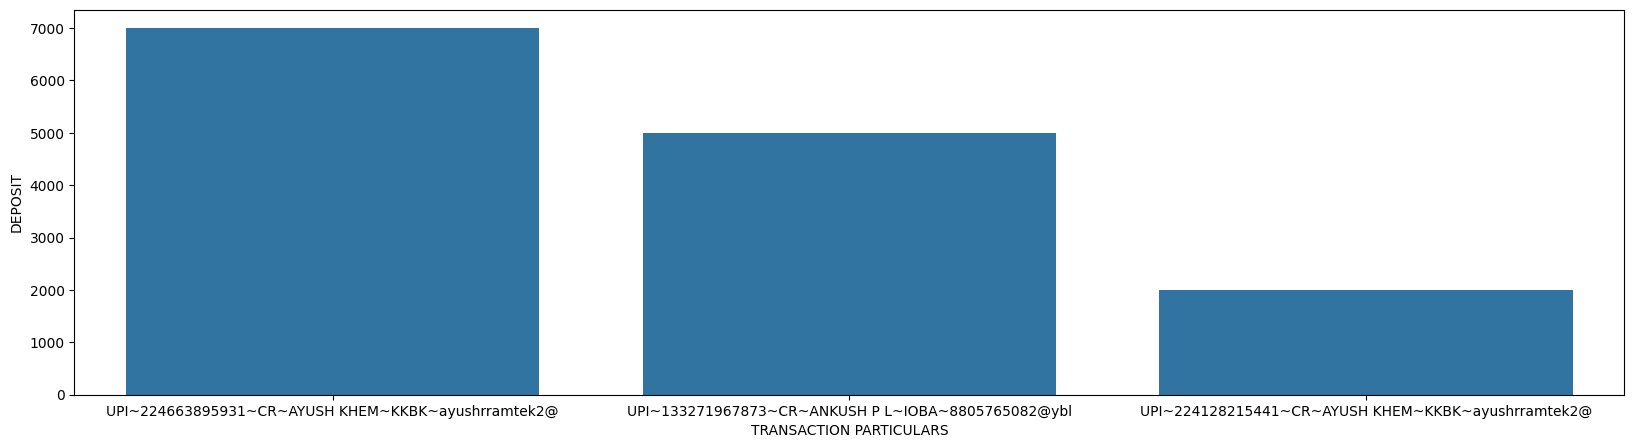

In [51]:
plt.figure(figsize=(20,5))

s_date = df.groupby(['TRANSACTION PARTICULARS'], as_index = False)['DEPOSIT'].sum().sort_values(by='DEPOSIT', ascending=False).head(3) 

sns.barplot(data= s_date, x= 'TRANSACTION PARTICULARS', y= 'DEPOSIT')

plt.show()

we observed that from TRANSACTION PARTICULARS 'AYUSH-KHEM-KKBK- ayushrramtek2@' we got more deposit

and 2nd highest deposit is from ANKUSH P L which 5000rs

<Axes: xlabel='YEAR', ylabel='count'>

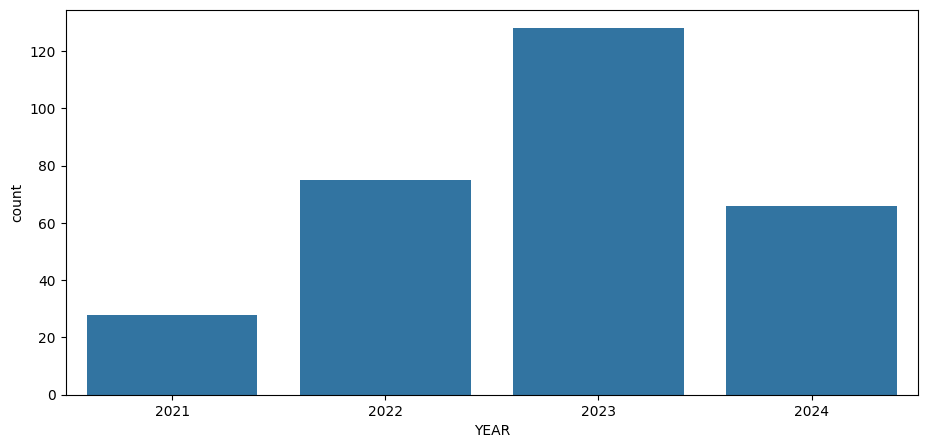

In [52]:
plt.figure(figsize=(11,5))
sns.countplot(df,x = df['YEAR'])

From above chart we can say that year 2023 has highest transaction.

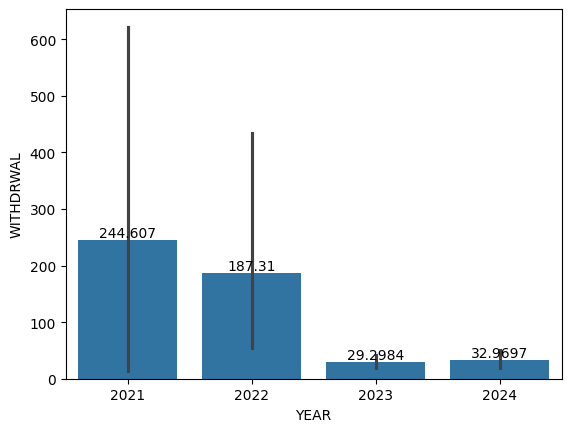

In [53]:
#s_m = df.groupby(['WITHDRWAL','DEPOSIT'], as index = False)['YEAR']
ax=sns.barplot(df,x= df['YEAR'], y= df['WITHDRWAL'])
for bars in ax.containers:
    ax.bar_label(bars)

from above chart we can say that the count of withdrwal is more in the 2021.

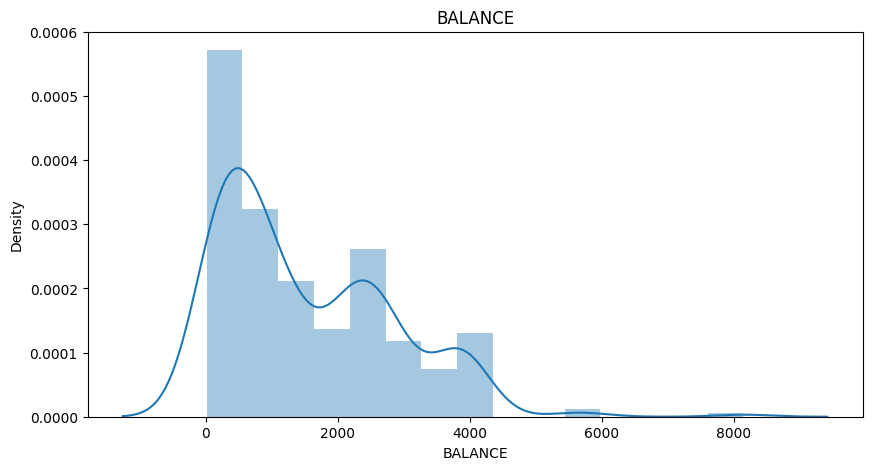

In [54]:
plt.figure(figsize=(10,5))
sns.distplot(df,x = df['BALANCE'], bins = 15)
plt.title("BALANCE")
plt.xlabel("BALANCE")
plt.show()

maximum range of balance in our account is between 0 to 4000rs.